# Środowiska uruchomieniowe C3. Streamlit 2.
#### Celem tego ćwiczenia jest przedstawienie w uproszczeniu procesu trenowania kilku podstawowych modeli ML. Wykorzystamy  zbiór danych pacjentów. Model będzie miał za zadanie przewidywać, czy pacjent wyzdrowieje po tygodniu.

### 1. Import bibliotek

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

### 2. Przygotowanie danych do analizy

In [4]:
os.getcwd()

'C:\\Users\\Bartek\\Desktop\\PJATK\\7semestr\\SUML\\PJATK_autoML\\C3'

In [5]:
base_data = pd.read_csv("dane.csv", delimiter=";");
base_data.columns
# na tym etapie tworzymy nową zmienną, którą nazywamy base_data, zawierającą nasz zbiór danych

cols = ["objawy","wiek","choroby","wzrost","zdrowie"]
data = base_data[cols].copy()

In [6]:
data.isnull().any()
# sprawdzamy czy mamy jakiekolwiek brakujące dane

objawy     False
wiek        True
choroby    False
wzrost      True
zdrowie    False
dtype: bool

#### Możemy wygenerować mapę ciepła symbolizującą braki danych - każdy "pomarańczowy pasek" to miejsce, w którym jest brak danych

<AxesSubplot:>

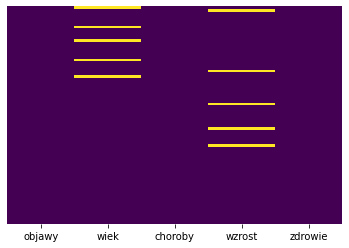

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# cbar ustalamy jako false, ponieważ nie wniesie nam to dodatkowych informacji

#### Już po tej prostej wizualizacji widzimy, że mamy dużo przypadków brakujących danych odnoszących się do wieku. Brakujące dane odnośnie wieku możemy zastąpić średnią.

In [8]:
# Transformations and additions
data["wiek"].fillna((data["wiek"].mean()), inplace=True) # wypełni nam brakujące informacje średnią
#data["wzrost"].fillna((data["wzrost"].mean()), inplace=True) # wypełni brakujące informacje średnią
data = data.dropna() # usunie wiersze, które mają brakujące informacje (np. brak wzrostu)

In [9]:
data.isnull().any()

objawy     False
wiek       False
choroby    False
wzrost     False
zdrowie    False
dtype: bool

### 3. Eksploracja danych

<AxesSubplot:xlabel='zdrowie', ylabel='count'>

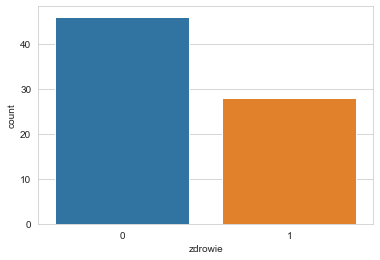

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='zdrowie',data=data)
# używamy biblioteki seaborn do stworzenia prostego wykresu symbolizującego osoby, które wyzdrowiały (0) i nie wyzdrowiały (1)

<AxesSubplot:xlabel='zdrowie', ylabel='count'>

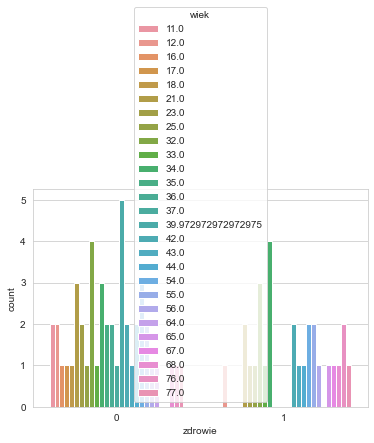

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='zdrowie',hue='wiek',data=data)
# możemy też wygenerować taki wykres, który powie nam więcej o wieku osób, które nie wyzdrowiały (1) bądź wyzdrowiały (0)

<AxesSubplot:xlabel='choroby', ylabel='wiek'>

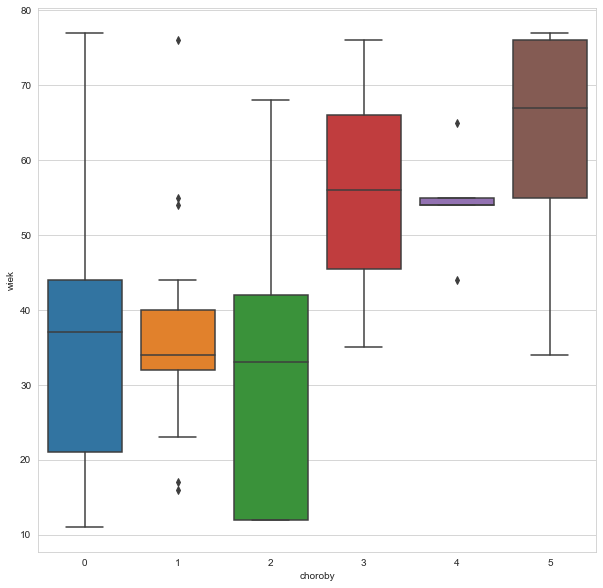

In [17]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='choroby',y='wiek',data=data)
# wygenerujemy sobie boxplot, czyli wykres skrzynkowy dla wieku oraz ilości chorób współistniejących

### 4. Trenowanie modelu

In [18]:
y = data.iloc[:,4] # zdrowie - zmienna, którą będziemy chcieli przewidzieć
x = data.iloc[:,0:3] # zmienne na podstawie, których chcemy przewidzieć (kolumny od 0 do 2 włącznie - jednak odrzucamy wzrost jako nieistotny dla rozpoznania stanu pacjenta)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 0)
# test size odnosi się do liczby obserwacji przeznaczonej do wytrenowania modelu; 0.5 oznacza, że bierzemy połowę zbioru danych

In [20]:
def model(X_train, y_train):
    
    forest = RandomForestClassifier( n_estimators=10, random_state=0)
    forest.fit(X_train,y_train)
    print("Las: {0}".format(forest.score(X_train,y_train)) )
    
    lreg = LogisticRegression()
    lreg.fit(X_train,y_train)
    print("Regresja logistyczna: {0}".format(lreg.score(X_train,y_train)) )
  
    tree = DecisionTreeClassifier()
    tree.fit(X_train,y_train)
    print("Drzewa decyzyjne: {0}".format(tree.score(X_train,y_train)) )
   
    return forest, lreg, tree

forest, lreg, tree = model(X_train,y_train)

Las: 1.0
Regresja logistyczna: 0.972972972972973
Drzewa decyzyjne: 1.0


In [21]:
target_names=["Nie wyzdrowiał","Wyzdrowiał"]

y1_predict = forest.predict(X_test)
print("Random Forest {0}".format(accuracy_score(y_test, y1_predict)))

y2_predict = lreg.predict(X_test)
print("Logistic Regresion {0}".format(accuracy_score(y_test, y2_predict)))

y3_predict = tree.predict(X_test)
print("Decision Tree {0}".format(accuracy_score(y_test, y3_predict)))

# uzyskujemy dzięki temu informacje dotyczącą dokładności modelu 

Random Forest 0.8648648648648649
Logistic Regresion 0.8918918918918919
Decision Tree 0.7567567567567568


In [22]:
print("Ocena modelu 1. Las")
print(classification_report(y_test,y1_predict))
# uzyskujemy informację o precyzji, recall, f1, etc.
# te wszystkie dane przydadzą się nam do oceny naszego modelu

Ocena modelu 1. Las
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        20
           1       1.00      0.71      0.83        17

    accuracy                           0.86        37
   macro avg       0.90      0.85      0.86        37
weighted avg       0.89      0.86      0.86        37



In [23]:
print("Ocena modelu 2. Regresja logistyczna")
print(classification_report(y_test,y2_predict))

Ocena modelu 2. Regresja logistyczna
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       1.00      0.76      0.87        17

    accuracy                           0.89        37
   macro avg       0.92      0.88      0.89        37
weighted avg       0.91      0.89      0.89        37



In [24]:
print("Ocena modelu 3. Drzewa decyzyjne")
print(classification_report(y_test,y3_predict))

Ocena modelu 3. Drzewa decyzyjne
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        20
           1       0.75      0.71      0.73        17

    accuracy                           0.76        37
   macro avg       0.76      0.75      0.75        37
weighted avg       0.76      0.76      0.76        37



### 5. Eksport modelu

#### Widzimy, że najlepszymi parametrami cechuje się model drugi (regresja logistyczna). Eksportujemy go do pickle.

In [25]:
filename = "model.sv"
pickle.dump(lreg, open(filename,'wb'))

### 6. Inne

#### Możemy jeszcze chwilę pobawić się i sprawdzić czy np. osoba z 1 objawem, będąca w wieku 20 lat i nieposiadająca chorób współistniejących, powinna wyzdrowieć po tygodniu. Model podpowiada nam, że ten pacjent powinnien być zdrowy po tygodniu.
#### Dla porównania drugi przykład (osoba w wieku 76 lat). Odczytujemy wynik i widzimy, że niestety nie przewiduje się jej wyzdrowienia po 7 dniach leczenia.

In [26]:
my_data =[
            [
             1,  #"objawy", liczba objawów przyjmująca wartość od 1 do 5 dla każdego pacjenta
             20,  #"wiek", wiek pacjenta
             0,  #"choroby", liczba chorób współistniejących przyjmująca wartość od 0 do 5
    ]
]

df = pd.DataFrame((my_data), columns=['objawy', 'wiek', 'choroby'])
print(df)

result = lreg.predict(df)

if result[0] == 0:
    print(target_names[1])
elif result[0] == 1:
    print(target_names[0])

   objawy  wiek  choroby
0       1    20        0
Wyzdrowiał


In [27]:
my_data =[
            [
             5,  #"objawy", liczba objawów przyjmująca wartość od 1 do 5 dla każdego pacjenta
             76,  #"wiek", wiek pacjenta
             5,  #"choroby", liczba chorób współistniejących przyjmująca wartość od 0 do 5
    ]
]

df = pd.DataFrame((my_data), columns=['objawy', 'wiek', 'choroby'])
print(df)

result = lreg.predict(df)

if result[0] == 0:
    print(target_names[1])
elif result[0] == 1:
    print(target_names[0])

   objawy  wiek  choroby
0       5    76        5
Nie wyzdrowiał


##### Opracowanie na podstawie omówienia przez Wojciecha Oronowicza-Jaśkowiaka [aplikacji](https://github.com/adamsquire/exploring_streamlit_apps) pierwotnie opisanej na blogu [Adam's Ramblings](https://adamsramblings.xyz/blog/exploring-streamlit-for-machine-learning-apps/)
##### Źródło danych - [przykładowy zbiór fikcyjnych pacjentów](https://drive.google.com/file/d/16DE3ARyp5L9xKtMHDbB16R5qrTda5G06/view?usp=sharing)